In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [ ]:
# Importando os dados
url = "heart.csv"
dataset = pd.read_csv(url,skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
y = dataset['exang']
x = dataset.drop(['exang'], axis=1)

In [ ]:
#normalização da tabela
normalizador = MinMaxScaler()
x = normalizador.fit_transform(x)
x = pd.DataFrame(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       297 non-null    float64
 1   1       297 non-null    float64
 2   2       297 non-null    float64
 3   3       297 non-null    float64
 4   4       297 non-null    float64
 5   5       297 non-null    float64
 6   6       297 non-null    float64
 7   7       297 non-null    float64
 8   8       297 non-null    float64
 9   9       297 non-null    float64
 10  10      297 non-null    float64
 11  11      297 non-null    float64
 12  12      297 non-null    float64
dtypes: float64(13)
memory usage: 30.3 KB


              precision    recall  f1-score   support

           0       0.71      0.91      0.80        57
           1       0.71      0.36      0.48        33

    accuracy                           0.71        90
   macro avg       0.71      0.64      0.64        90
weighted avg       0.71      0.71      0.68        90

O acerto foi de:  0.7111111111111111


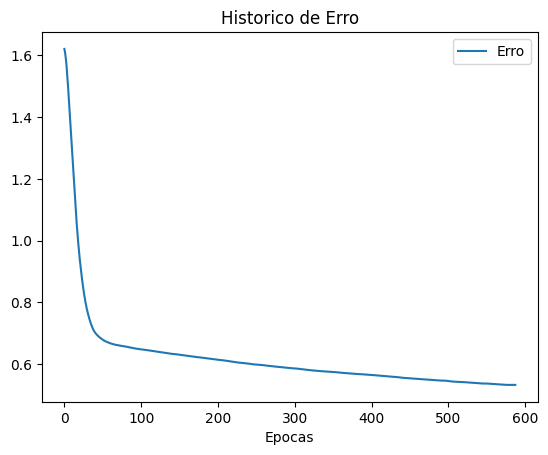

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3
#data as data test


#inicialização - Minha rede tera 4 entradas, 1º camada 18 neuronios, 2º camada
#5 neuronios, saida com 3 neuronios
Model = MLPClassifier(hidden_layer_sizes=(18,5), activation='tanh',max_iter=1000,
                      alpha=0.4, solver='sgd', verbose=0,  random_state=121)
                                                      # verbode=0 retira o log
#train
h = Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
print(classification_report(y_test,y_pred)) # Print
print('O acerto foi de: ',accuracy_score(y_pred,y_test)) # Print accuracy score

#plots
plt.plot(h.loss_curve_)
plt.title('Historico de Erro')
plt.xlabel('Epocas')
plt.legend(['Erro'])

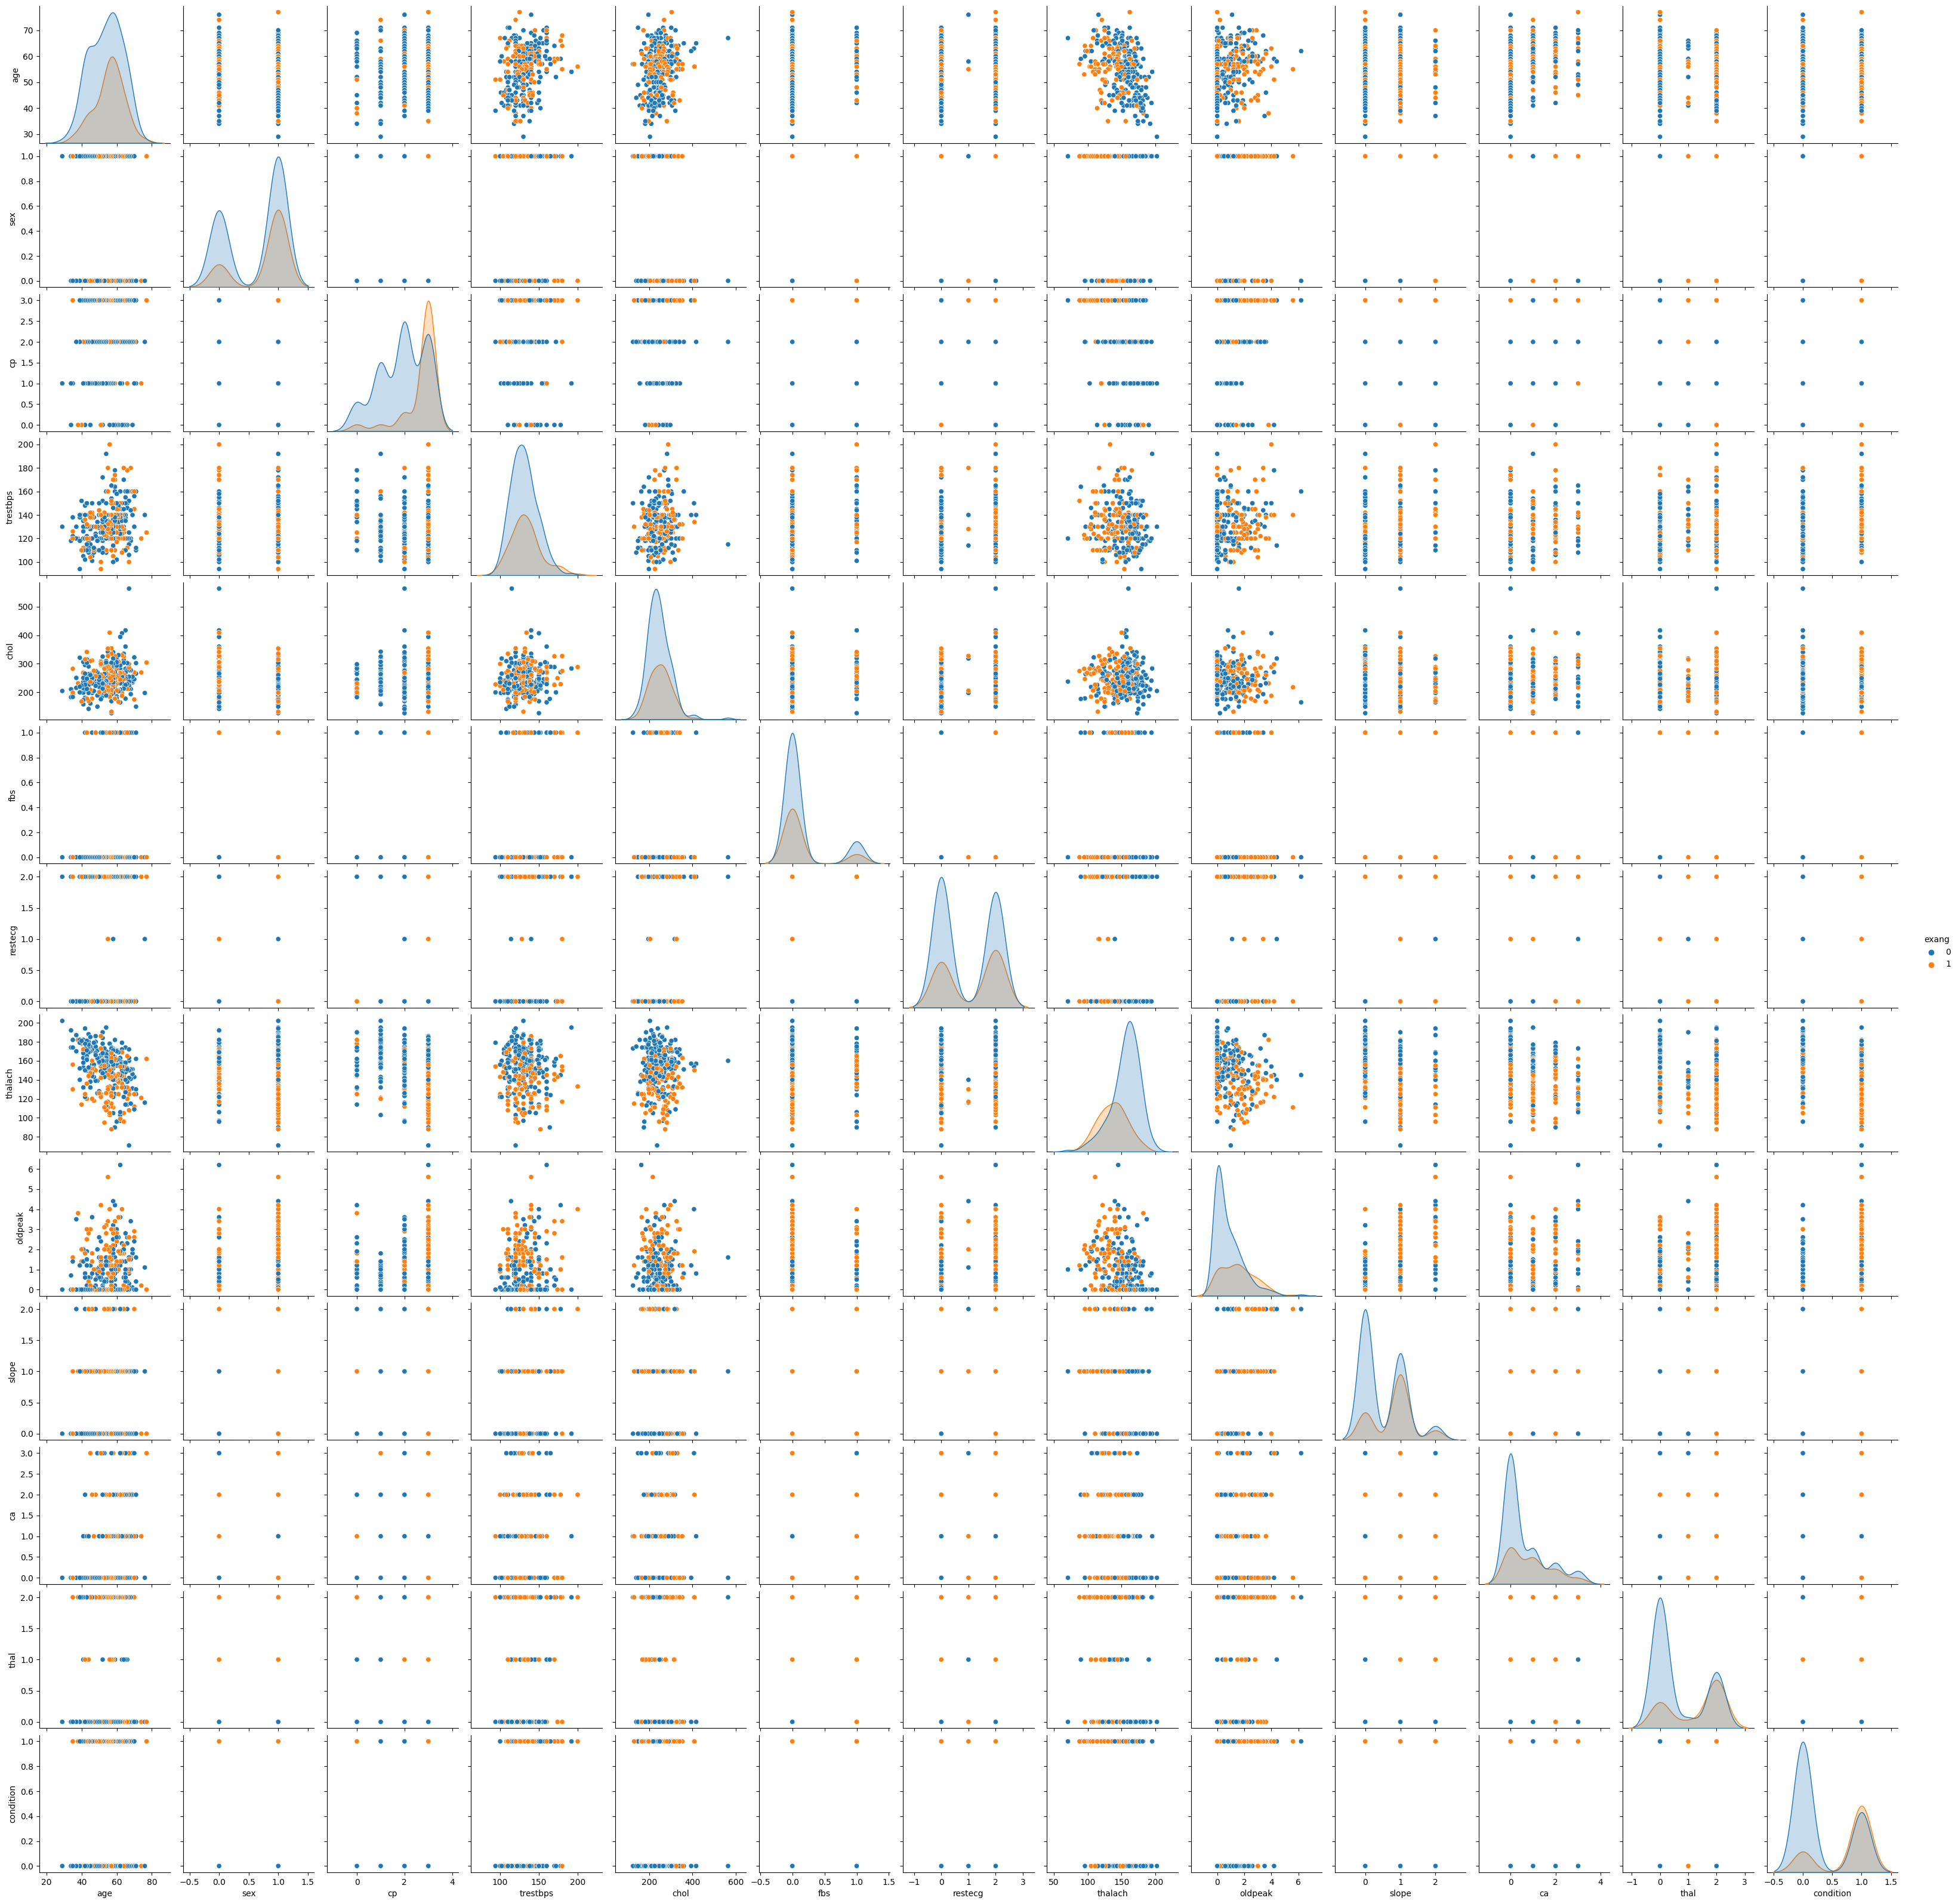

In [ ]:
sb.pairplot(dataset, hue='exang')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

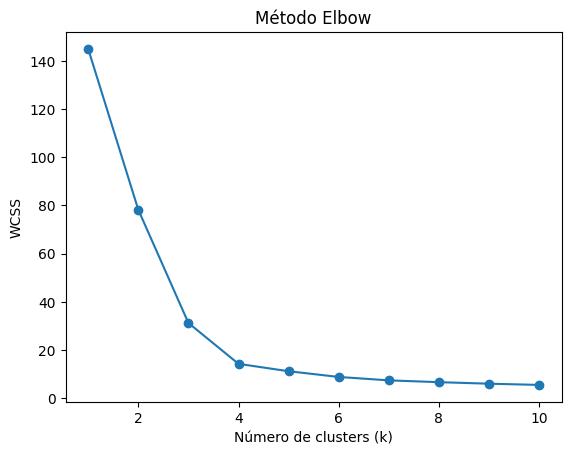

In [ ]:
# Selecionar as colunas de interesse
data = dataset[['age', 'sex', 'chol', 'exang']]

# Normalizar os dados
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Calcular a soma dos quadrados intra-cluster para diferentes valores de k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


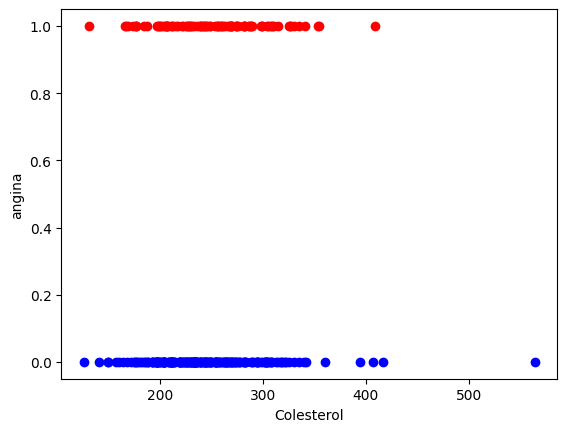

In [ ]:
# Seleciona as colunas a serem analizadas
data = dataset[['chol', 'exang']]

# Normalização dos dados
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# número de clusters
num_clusters = 2

# Executa o algoritmo de agrupamento K-means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(data_normalized)

# Obtem as labels dos clusters
cluster_labels = kmeans.labels_

# Atribui uma cor para cada cluster
colors = ['blue', 'red'] # vermelho para quem tem aginia e azul para quem não tem.

# Mostra as amostras coloridas por cluster
for i, label in enumerate(cluster_labels):
    plt.scatter(data['chol'][i], data['exang'][i], color=colors[label])

# Configurar os rótulos dos eixos
plt.xlabel('Colesterol')
plt.ylabel('angina')

# Mostrar o gráfico com as amostras coloridas por cluster
plt.show()
